In [ ]:

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

Cloning into 'yolov5'...
remote: Enumerating objects: 15114, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 15114 (delta 32), reused 28 (delta 11), pack-reused 15045
Receiving objects: 100% (15114/15114), 14.19 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (10349/10349), done.
/content/yolov5
HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


In [ ]:

!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output
from utils.downloads import attempt_download


print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00
Setup complete. Using torch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:

!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [ ]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YoXKA6EkmU5LRjxMIuZ1")
project = rf.workspace("master-kjrf4").project("droneditect")
dataset = project.version(1).download("yolov5")

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to droneditect-1 in yolov5pytorch:: 100%|██████████| 11066/11066 [00:03<00:00, 3485.98it/s]


In [ ]:

%cat {dataset.location}/data.yaml

names:
- '0'
nc: 1
roboflow:
  license: Public Domain
  project: droneditect
  url: https://universe.roboflow.com/project/droneditect/dataset/1
  version: 1
  workspace: project
test: ../test/images
train: droneditect-1/train/images
val: droneditect-1/valid/images


In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 200 --data /content/yolov5/droneditect-1/data.yaml --cfg ./models/custom_yolov5x.yaml --weights '' --name yolov5x_results  --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5x.yaml, data=/content/yolov5/droneditect-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5x_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 459 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_b

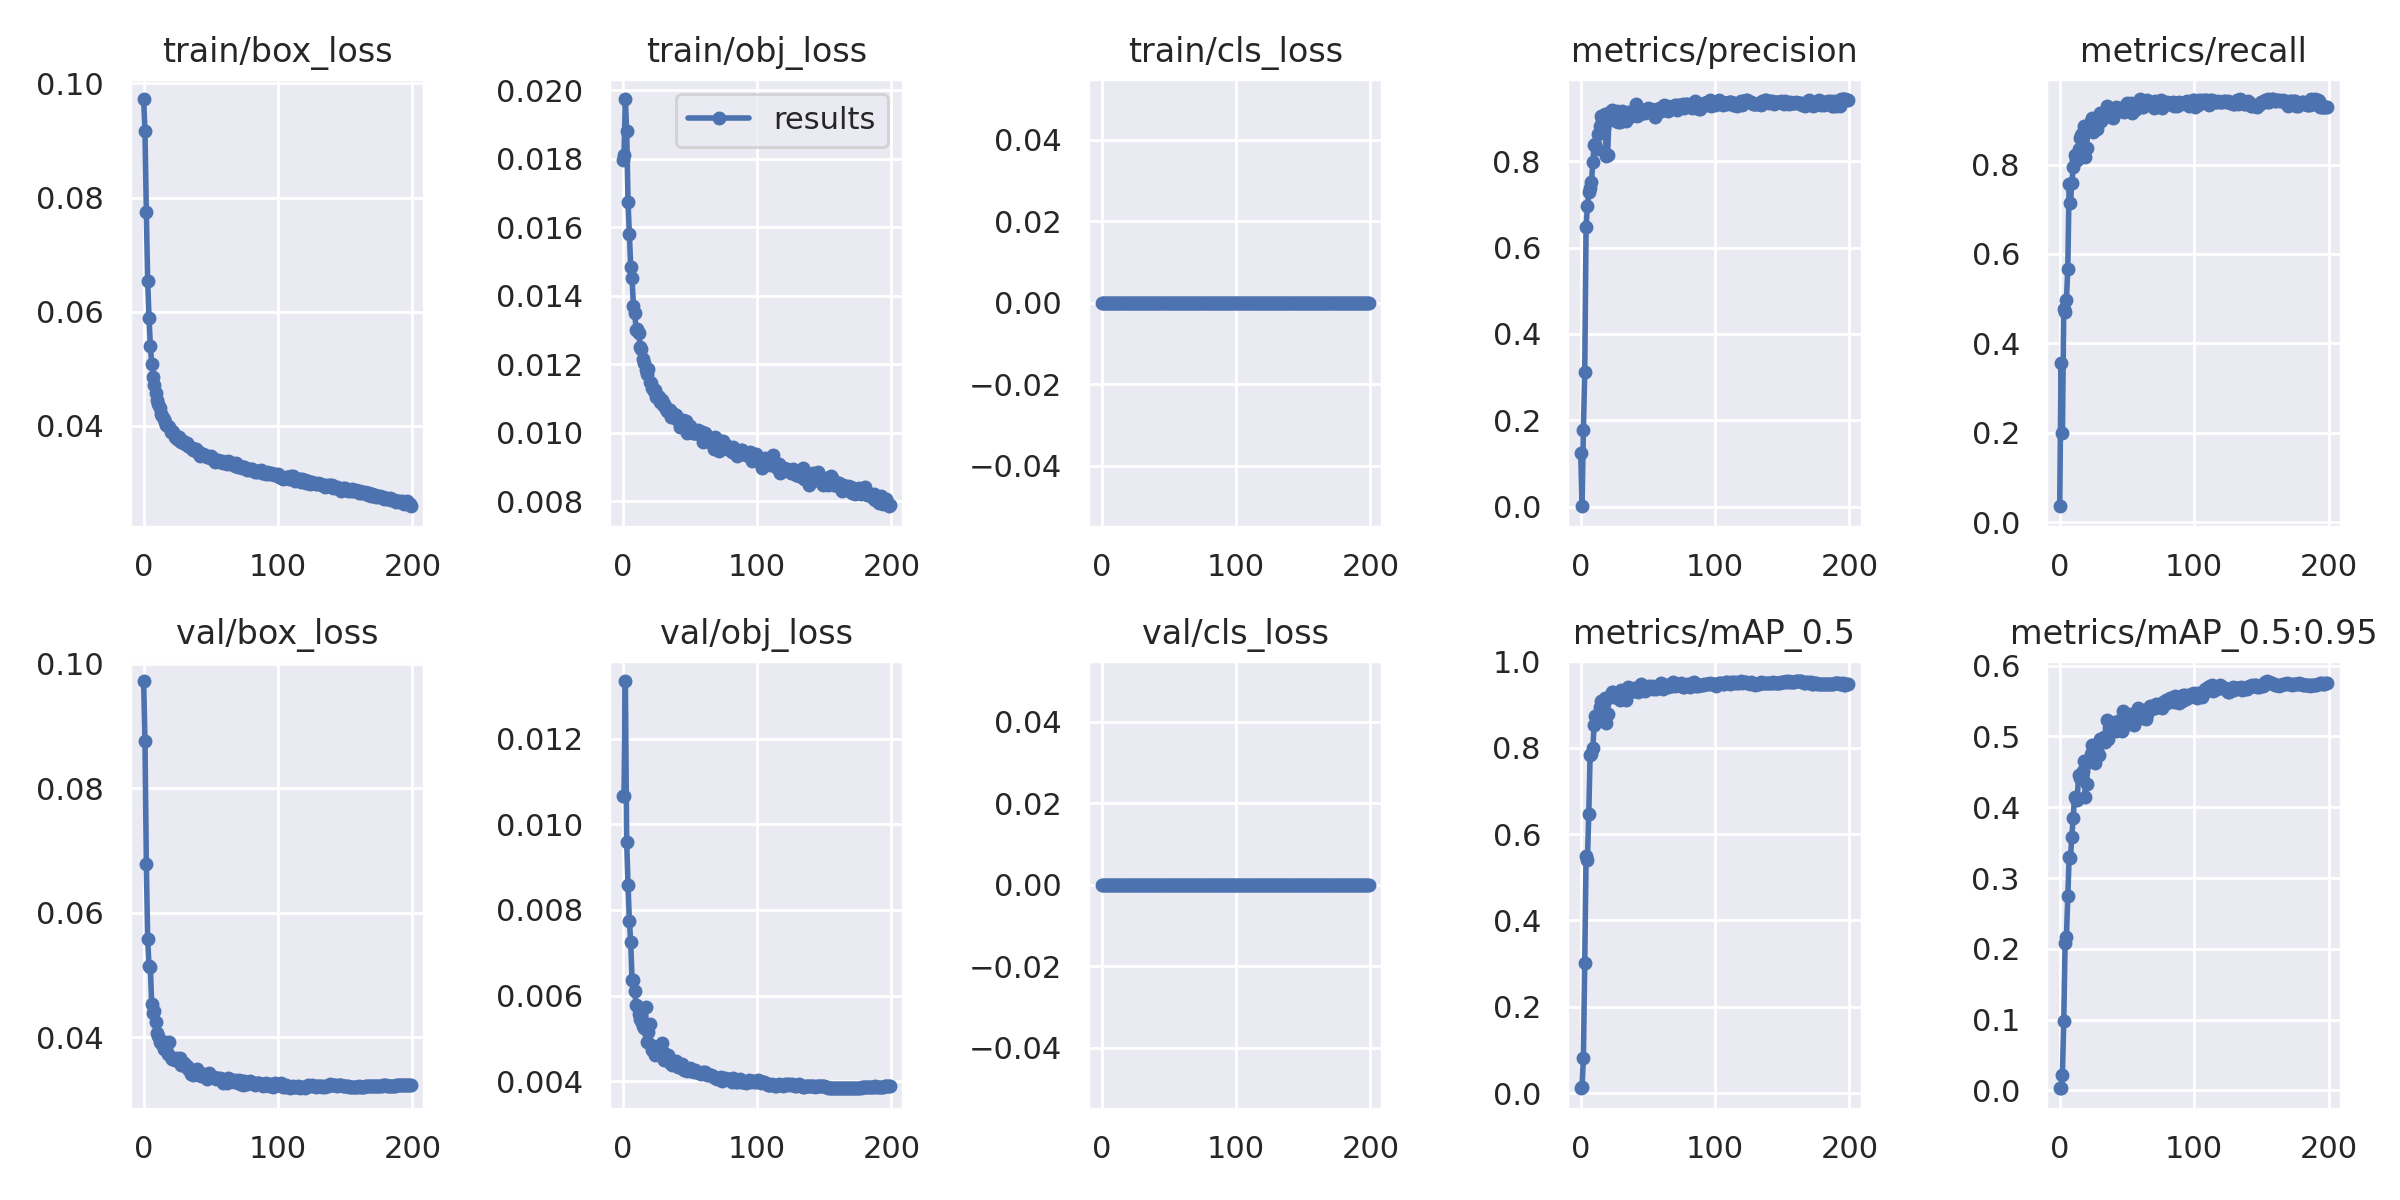

In [ ]:

from utils.plots import plot_results
Image(filename='/content/yolov5/runs/train/yolov5x_results/results.png', width=1000)

GROUND TRUTH TRAINING DATA:


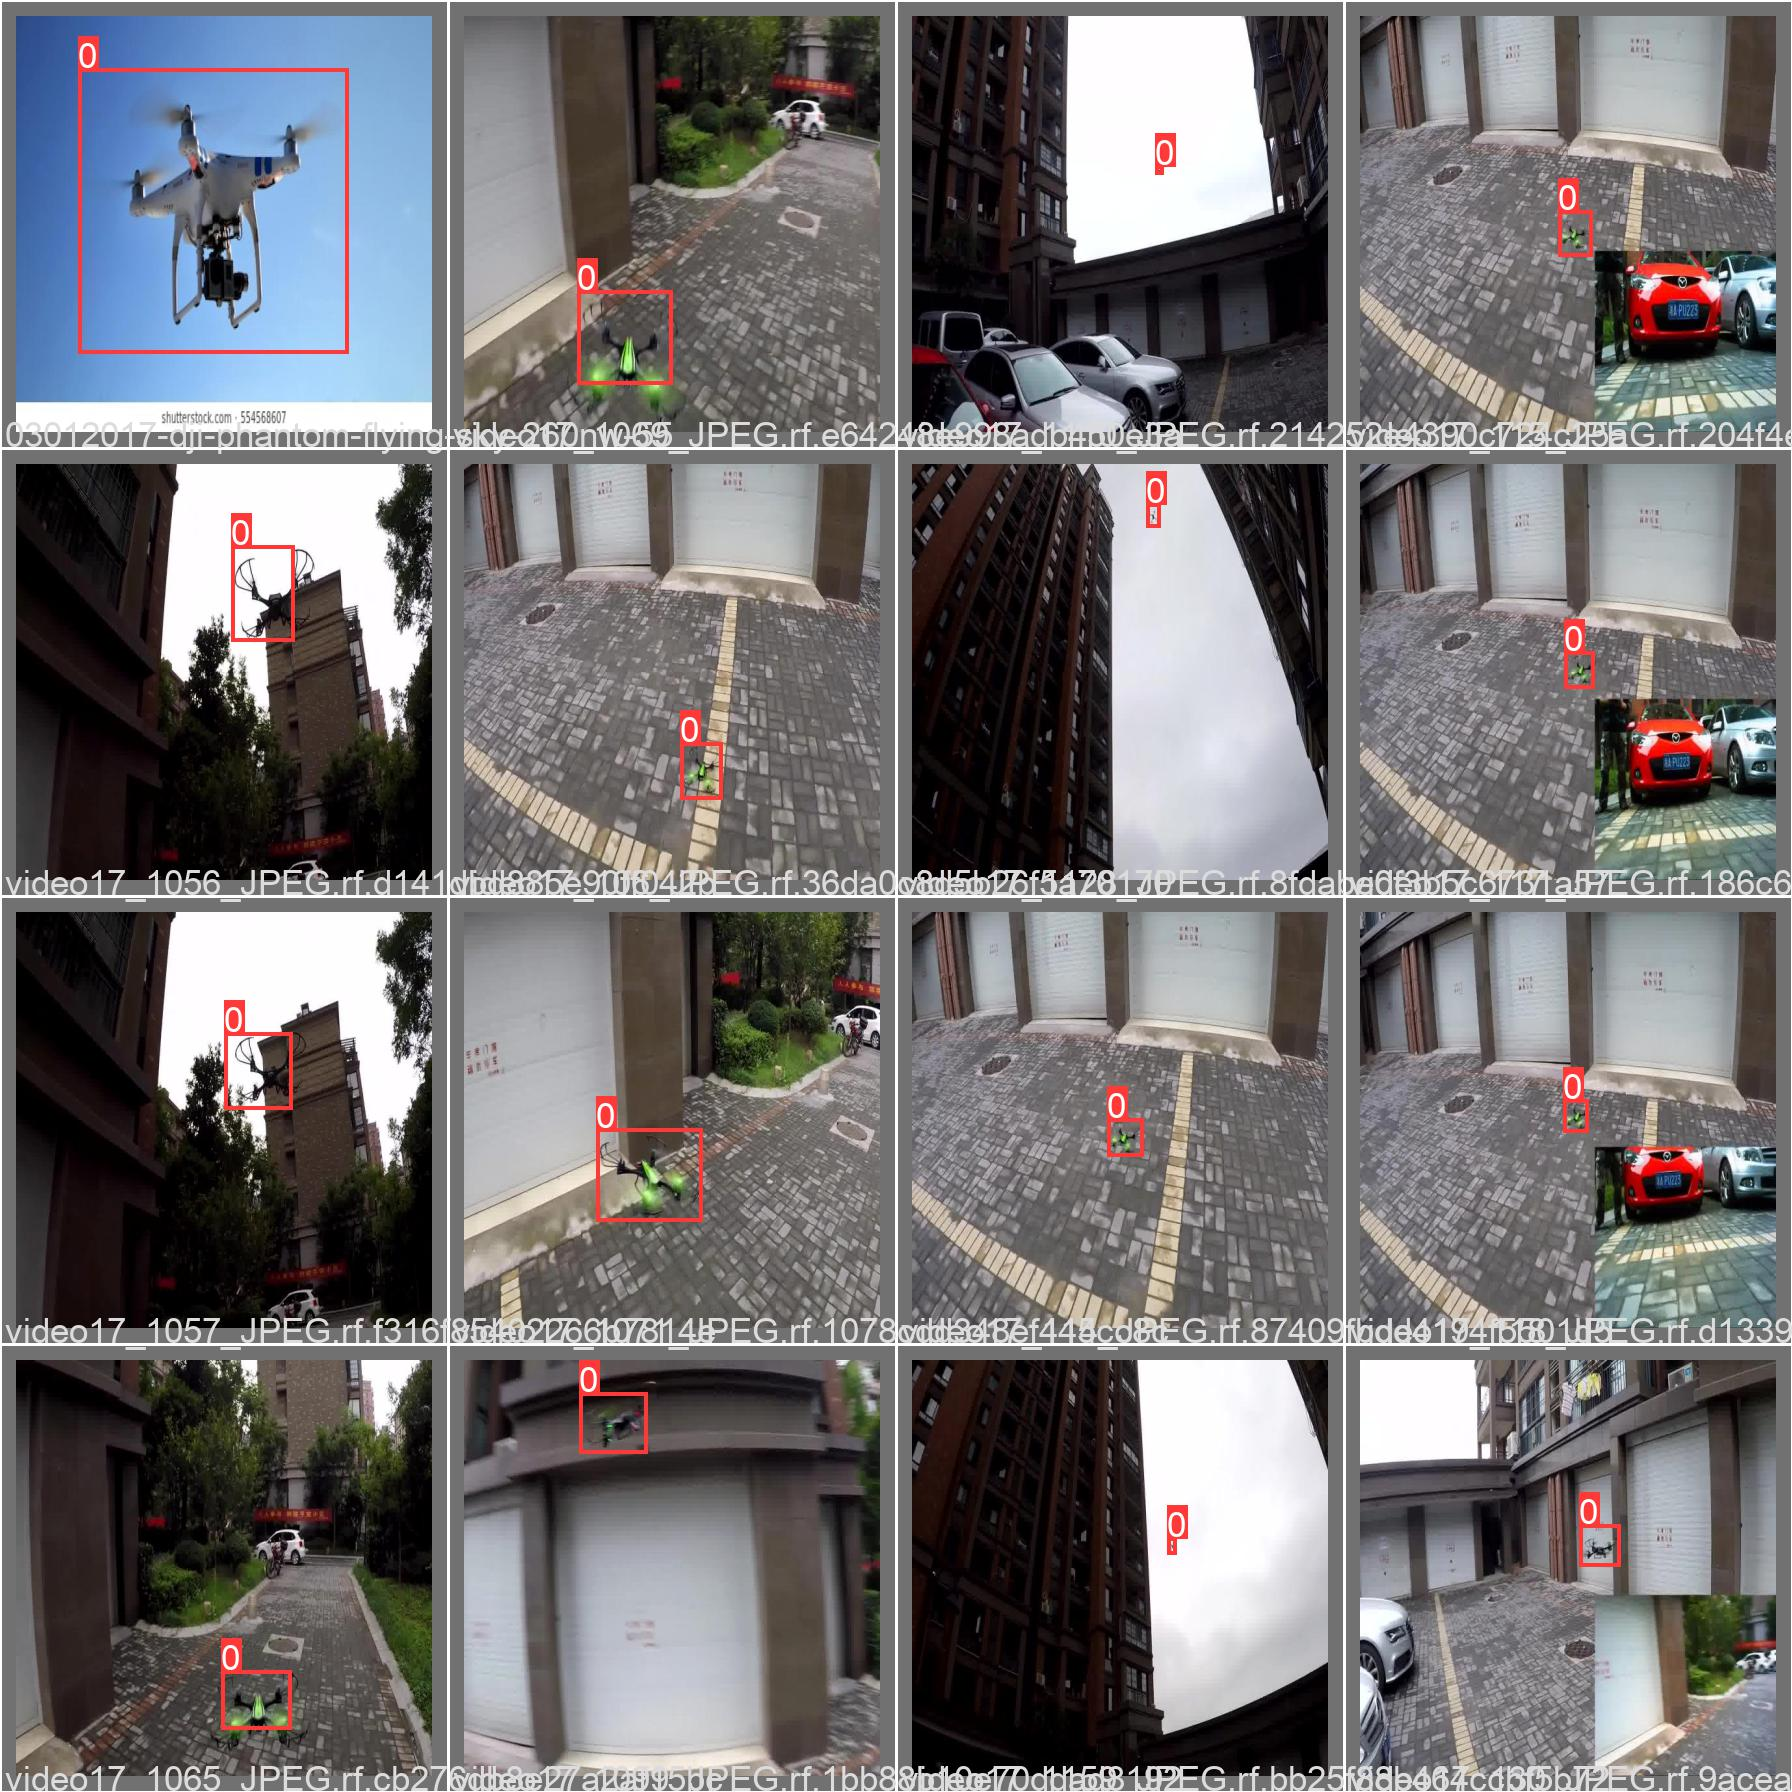

In [ ]:

print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5x_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


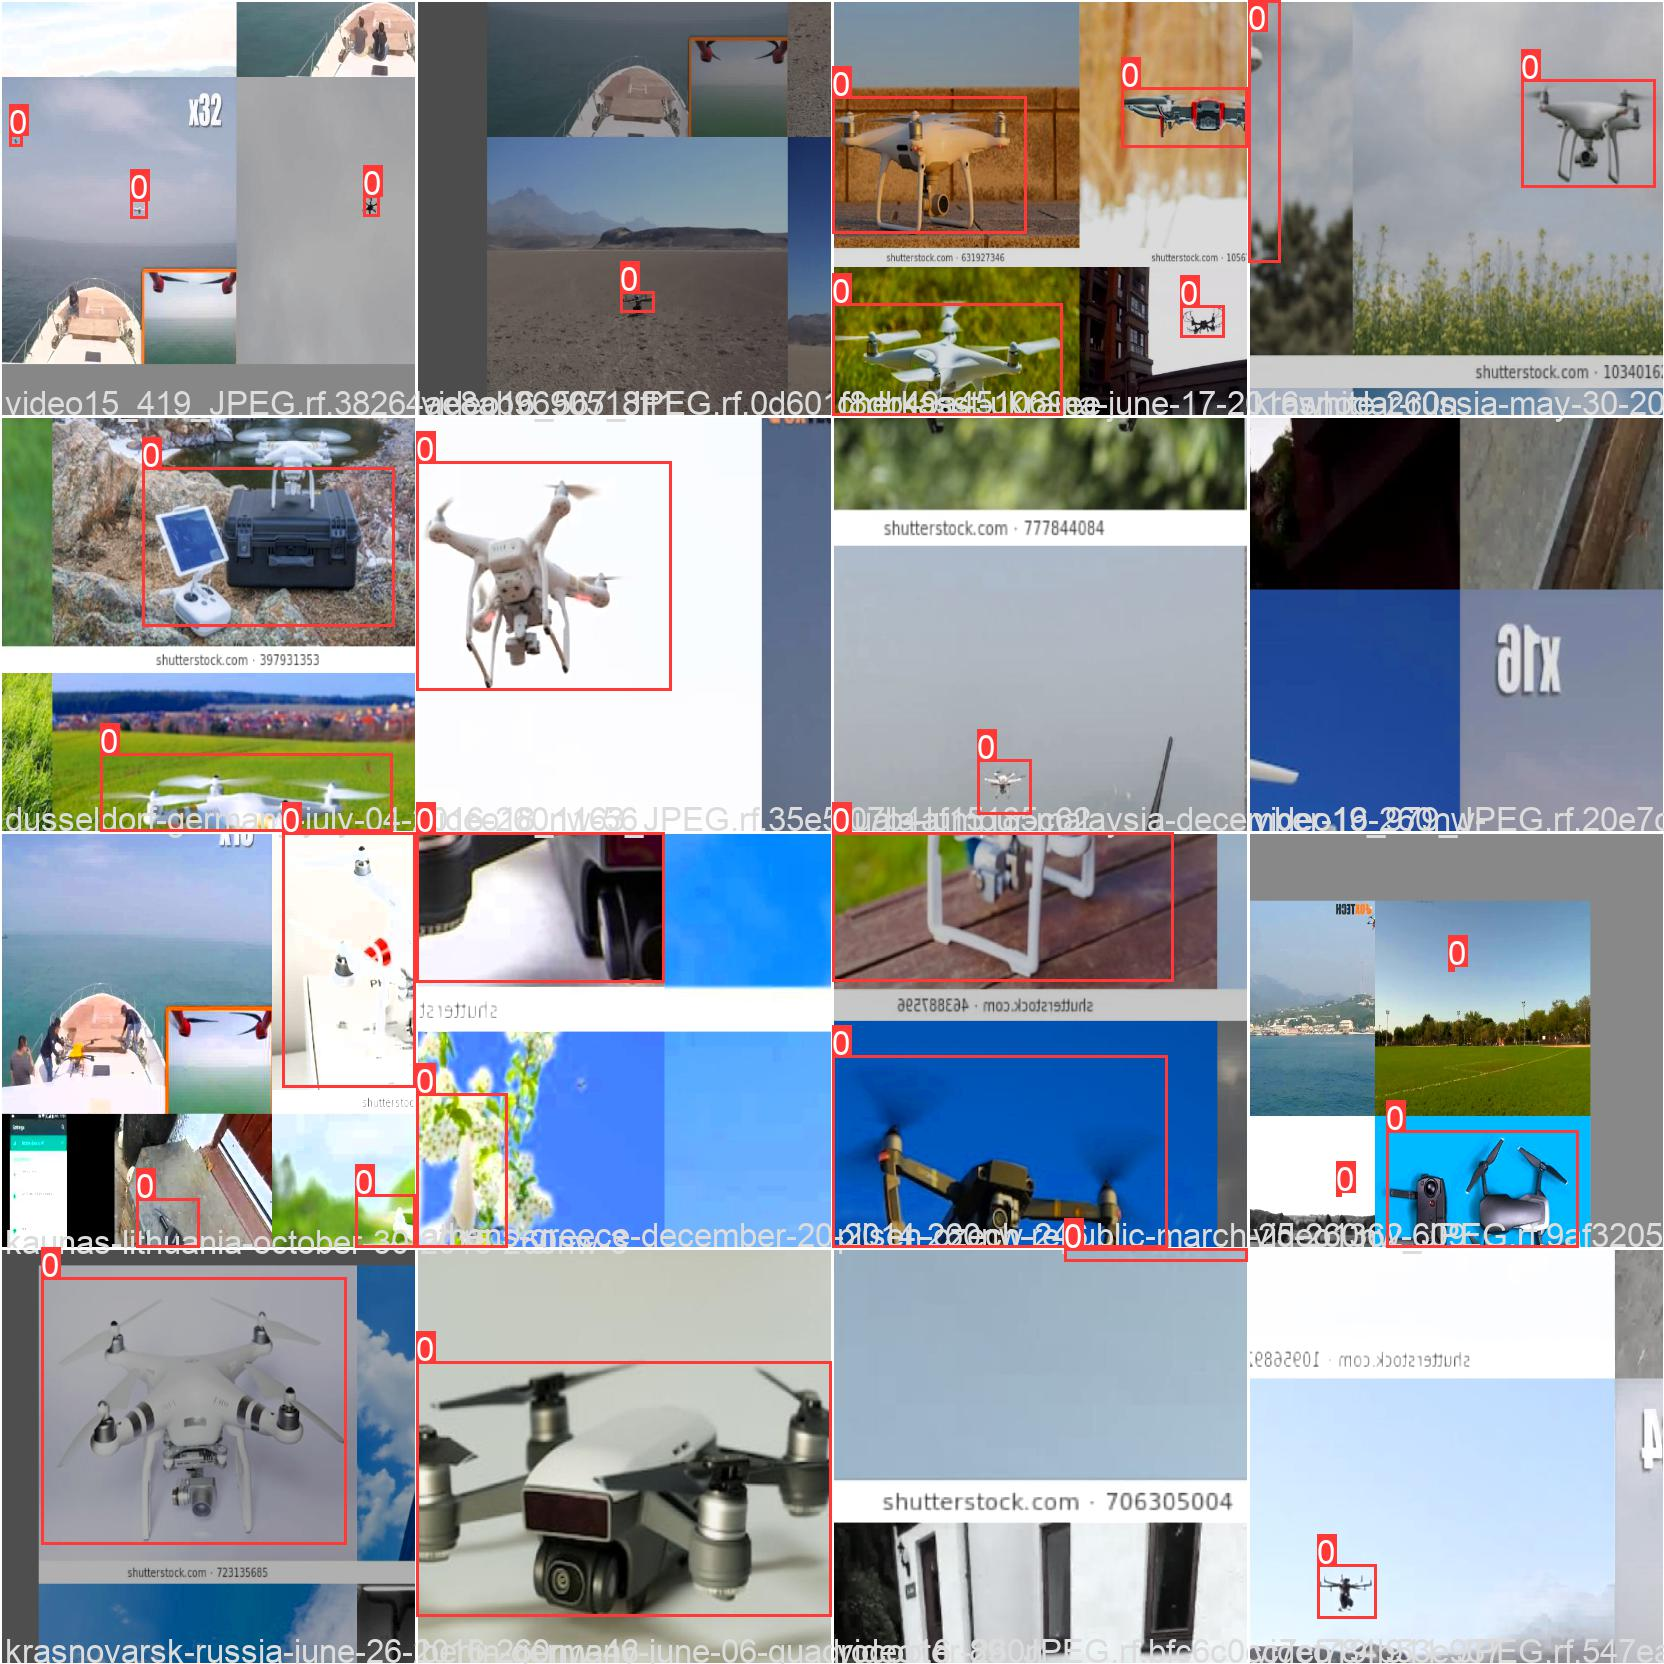

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5x_results/train_batch0.jpg', width=900)

In [ ]:

%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

ls: cannot access 'runs/train/yolov5s_results/weights': No such file or directory


In [ ]:

%cd /content/yolov5/
%pwd
!python detect.py --weights runs/train/yolov5x_results/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/droneditect-1/test/images

/content/yolov5
detect: weights=['runs/train/yolov5x_results/weights/best.pt'], source=/content/yolov5/droneditect-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5x summary: 232 layers, 7246518 parameters, 0 gradients, 16.7 GFLOPs
image 1/228 /content/yolov5/droneditect-1/test/images/03012017-dji-phantom-flying-sky-260nw-555436897_jpg.rf.5184bc113d9f7f4bf4627f99e6d9fb02.jpg: 416x416 1 0, Done. (0.011s)
image 2/228 /content/yolov5/droneditect-1/test/images/120_JPEG.rf.1e805d4ade81c48edaf15f77e15baba8.jpg: 416x416 1 0, Done. (0.0

In [ ]:
!zip -r /content/result.zip /content/yolov5/runs/train/yolov5x_results

  adding: content/yolov5/runs/train/yolov5x_results/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5x_results/train_batch1.jpg (deflated 3%)
  adding: content/yolov5/runs/train/yolov5x_results/R_curve.png (deflated 19%)
  adding: content/yolov5/runs/train/yolov5x_results/labels.jpg (deflated 19%)
  adding: content/yolov5/runs/train/yolov5x_results/val_batch1_labels.jpg (deflated 13%)
  adding: content/yolov5/runs/train/yolov5x_results/val_batch2_labels.jpg (deflated 19%)
  adding: content/yolov5/runs/train/yolov5x_results/weights/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5x_results/weights/last.pt (deflated 10%)
  adding: content/yolov5/runs/train/yolov5x_results/weights/best.pt (deflated 10%)
  adding: content/yolov5/runs/train/yolov5x_results/train_batch0.jpg (deflated 6%)
  adding: content/yolov5/runs/train/yolov5x_results/opt.yaml (deflated 43%)
  adding: content/yolov5/runs/train/yolov5x_results/val_batch0_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/t

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/My\ Drive

## Congrats!

Hope you enjoyed this!

--Team [Roboflow](https://roboflow.ai)